In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn import metrics

#%matplotlib notebook
%matplotlib inline
pd.set_option('display.max_rows',None)
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006629 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.365220 -0.124151     0.070462   
LotFrontage   -0.006629   -0.365220     1.000000  0.557257     0.247809   
LotArea       -0.029212   -0.124151     0.557257  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.247809  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.053345  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.118554  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.096050  0.027228     0.555945   
MasVnrArea    -0.060652    0.027868     0.202225  0.121448     0.409163   
BsmtFinSF1     0.003868   -0.052236     0.247780  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.002514  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.123943  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.386261  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.448186  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.099250  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.007885 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.410414  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.104255  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001528  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.189321  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.053168  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.264010  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002890 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.351969  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.262076  0.285983     0.390067   
GarageYrBlt   -0.000469    0.077630     0.061101 -0.034981     0.541719   
GarageCars     0.007549   -0.027639     0.276798  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.344908  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.101751  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.167092  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.023118 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.059508  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.033111  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.223429  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.004559  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.025046  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004296 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.341294  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.060652    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.027868   -0.052236   
LotFrontage      -0.053345   0.118554      0.096050    0.202225    0.247780   
LotArea           0.017513   0.005506      0.027228    0.121448    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.409163    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.137882   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.323006    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.181869    0.114430   
MasVnrArea       -0.137882   0.323006      0.181869    1.000000    0.267066   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.267066    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.065723   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.109850   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.366833    0

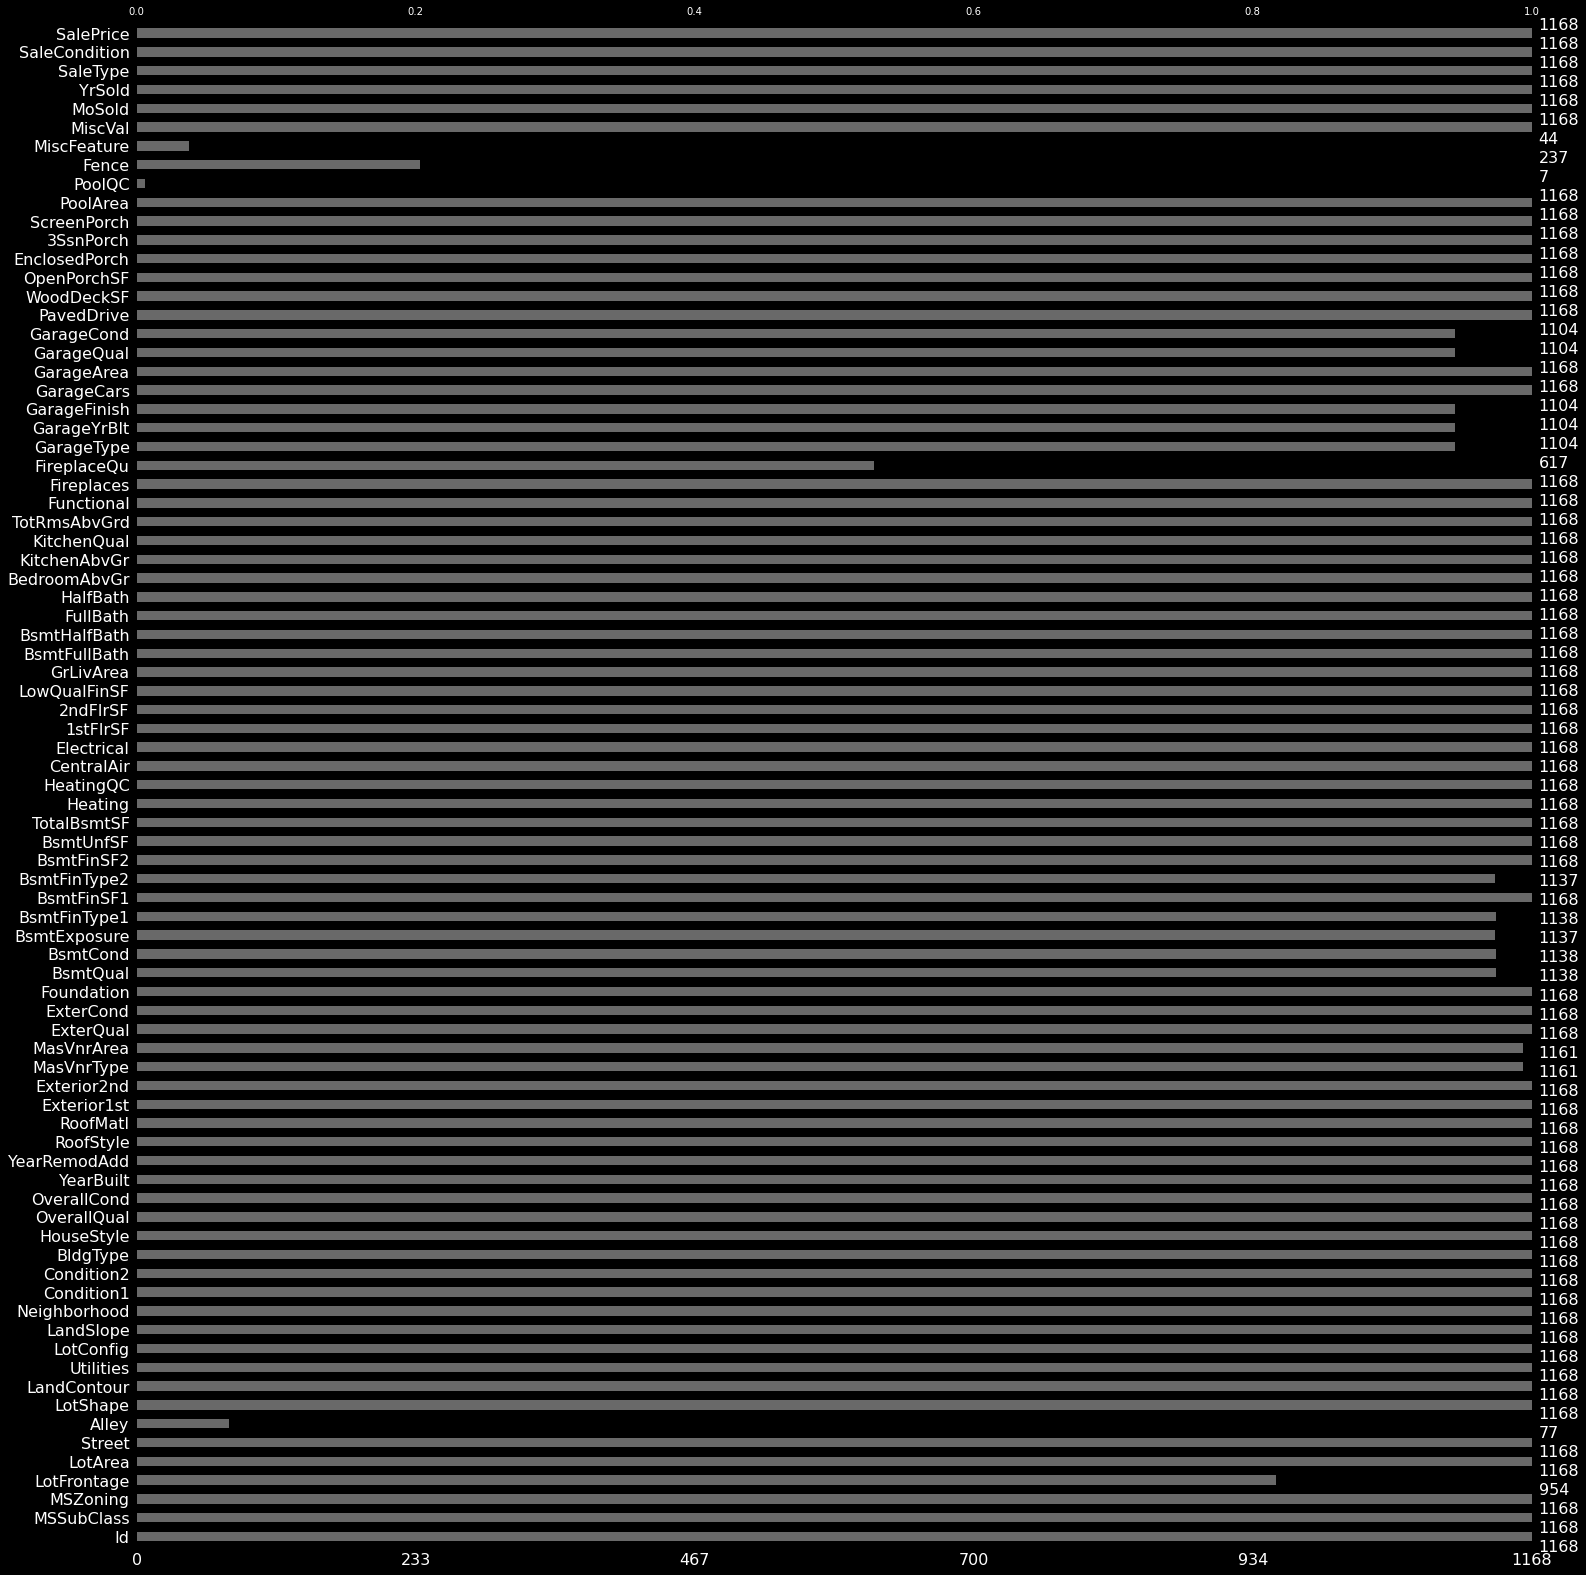

In [7]:
import missingno as msno

msno.bar(df)
plt.show()

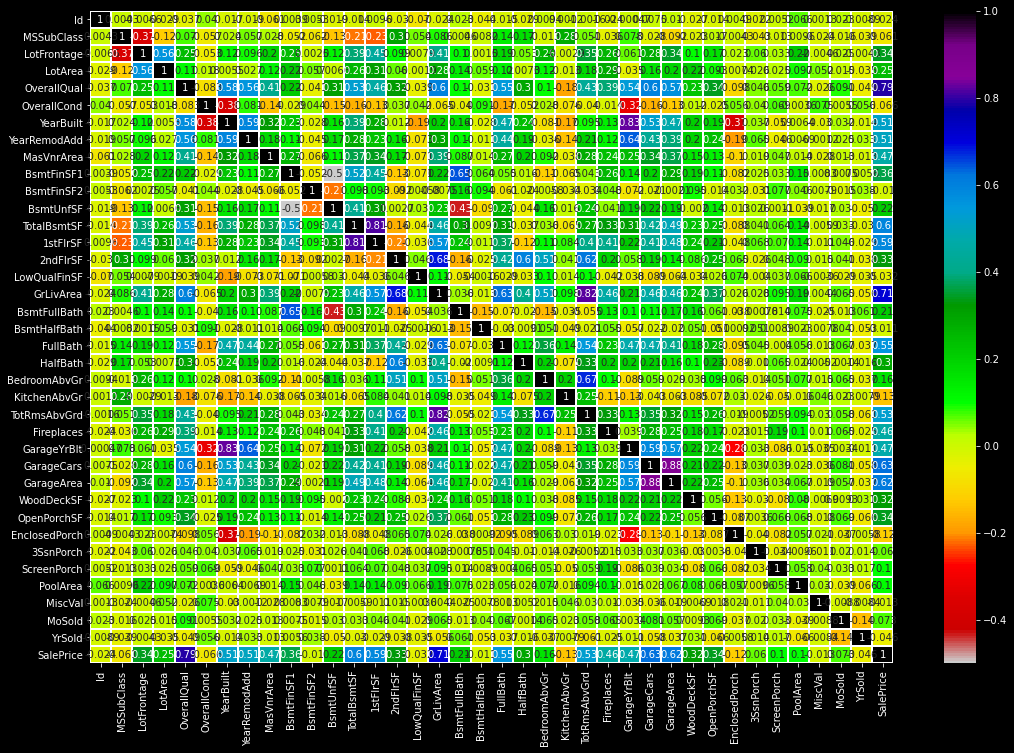

In [8]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr,cmap='nipy_spectral_r', annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [9]:
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [10]:
df.fillna(0)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          0.0     4928   Pave     0      IR1   
1      889          20       RL         95.0    15865   Pave     0      IR1   
2      793          60       RL         92.0     9920   Pave     0      IR1   
3      110          20       RL        105.0    11751   Pave     0      IR1   
4      422          20       RL          0.0    16635   Pave     0      IR1   
5     1197          60       RL         58.0    14054   Pave     0      IR1   
6      561          20       RL          0.0    11341   Pave     0      IR1   
7     1041          20       RL         88.0    13125   Pave     0      Reg   
8      503          20       RL         70.0     9170   Pave     0      Reg   
9      576          50       RL         80.0     8480   Pave     0      Reg   
10     449          50       RM         50.0     8600   Pave     0      Reg   
11     833          60       RL         44.0     9548   Pave     0      IR1   
12     277          20       RL        129.0     9196   Pave     0      IR1   
13      84          20       RL         80.0     8892   Pave     0      IR1   
14     888          50       RL         59.0    16466   Pave     0      IR1   
15    1013          70       RL         55.0    10592   Pave     0      Reg   
16    1154          30       RM          0.0     5890   Pave     0      Reg   
17     728          20       RL         64.0     7314   Pave     0      Reg   
18     270          20       RL          0.0     7917   Pave     0      IR1   
19    1105         160       RM         24.0     2016   Pave     0      Reg   
20     259          60       RL         80.0    12435   Pave     0      Reg   
21    1407          85       RL         70.0     8445   Pave     0      Reg   
22    1459          20       RL         68.0     9717   Pave     0      Reg   
23     997          20       RL          0.0    10659   Pave     0      IR1   
24    1094          20       RL         71.0     9230   Pave     0      Reg   
25     114          20       RL          0.0    21000   Pave     0      Reg   
26    1384          30       RL          0.0    25339   Pave     0      Reg   
27     379          20       RL         88.0    11394   Pave     0      Reg   
28     556          45       RM         58.0     6380   Pave     0      Reg   
29     464          70       RL         74.0    11988   Pave     0      IR1   
30      46         120       RL         61.0     7658   Pave     0      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          0.0    18890   Pave     0      IR1   
33     171          50       RM          0.0    12358   Pave     0      IR1   
34     869          60       RL          0.0    14762   Pave     0      IR2   
35     151          20       RL        120.0    10356   Pave     0      Reg   
36     859          20       RL         80.0    10400   Pave     0      Reg   
37     176          20       RL         84.0    12615   Pave     0      Reg   
38     361          85       RL          0.0     7540   Pave     0      IR1   
39     590          40       RM         50.0     9100   Pave     0      Reg   
40     172          20       RL        141.0    31770   Pave     0      IR1   
41     527          20       RL         70.0    13300   Pave     0      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave     0      Reg   
44    1006          80       RL         65.0     8385   Pave     0      Reg   
45     275          20       RL         76.0     8314   Pave     0      Reg   
46     380          60       RL         60.0     8123   Pave     0      IR1   
47    1309          20       RM        100.0    12000   Pave     0      Reg   
48     534          20       RL         50.0     5000   Pave     0      Reg   
49     494          20       RL         70.0     7931   Pa

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
cat_df = df.select_dtypes(include = ['object'])

In [13]:
cat_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      NPkVill       Norm  ...     Attchd          RFn         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      NoRidge       Norm  ...     Attchd          Unf         TA         TA   
3       NWAmes       Norm  ...     Attchd          RFn         TA         TA   
4       NWAmes       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN    NaN         NaN       WD        Normal  
1          Y    NaN    NaN         NaN       WD        Normal  
2          Y    NaN    NaN         NaN       WD        Normal  
3          Y    NaN  MnPrv         NaN      COD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [14]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

MSZoning: 
['RL' 'RM' 'FV' 'RH' 'C (all)']

Street: 
['Pave' 'Grvl']

Alley: 
[nan 'Grvl' 'Pave']

LotShape: 
['IR1' 'Reg' 'IR2' 'IR3']

LandContour: 
['Lvl' 'Bnk' 'HLS' 'Low']

Utilities: 
['AllPub']

LotConfig: 
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']

LandSlope: 
['Gtl' 'Mod' 'Sev']

Neighborhood: 
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']

Condition1: 
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']

Condition2: 
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']

BldgType: 
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']

HouseStyle: 
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']

RoofStyle: 
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']

RoofMatl: 
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran

In [15]:
num_df = df.select_dtypes(include = ['int64'])
num_df.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120     4928            6            5       1976   
1  889          20    15865            8            6       1970   
2  793          60     9920            7            5       1996   
3  110          20    11751            6            6       1977   
4  422          20    16635            6            7       1977   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0          1976         120           0        958  ...           0   
1          1970         351         823       1043  ...          81   
2          1997         862           0        255  ...         180   
3          1977         705           0       1139  ...           0   
4          2000        1246           0        356  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 35 columns]

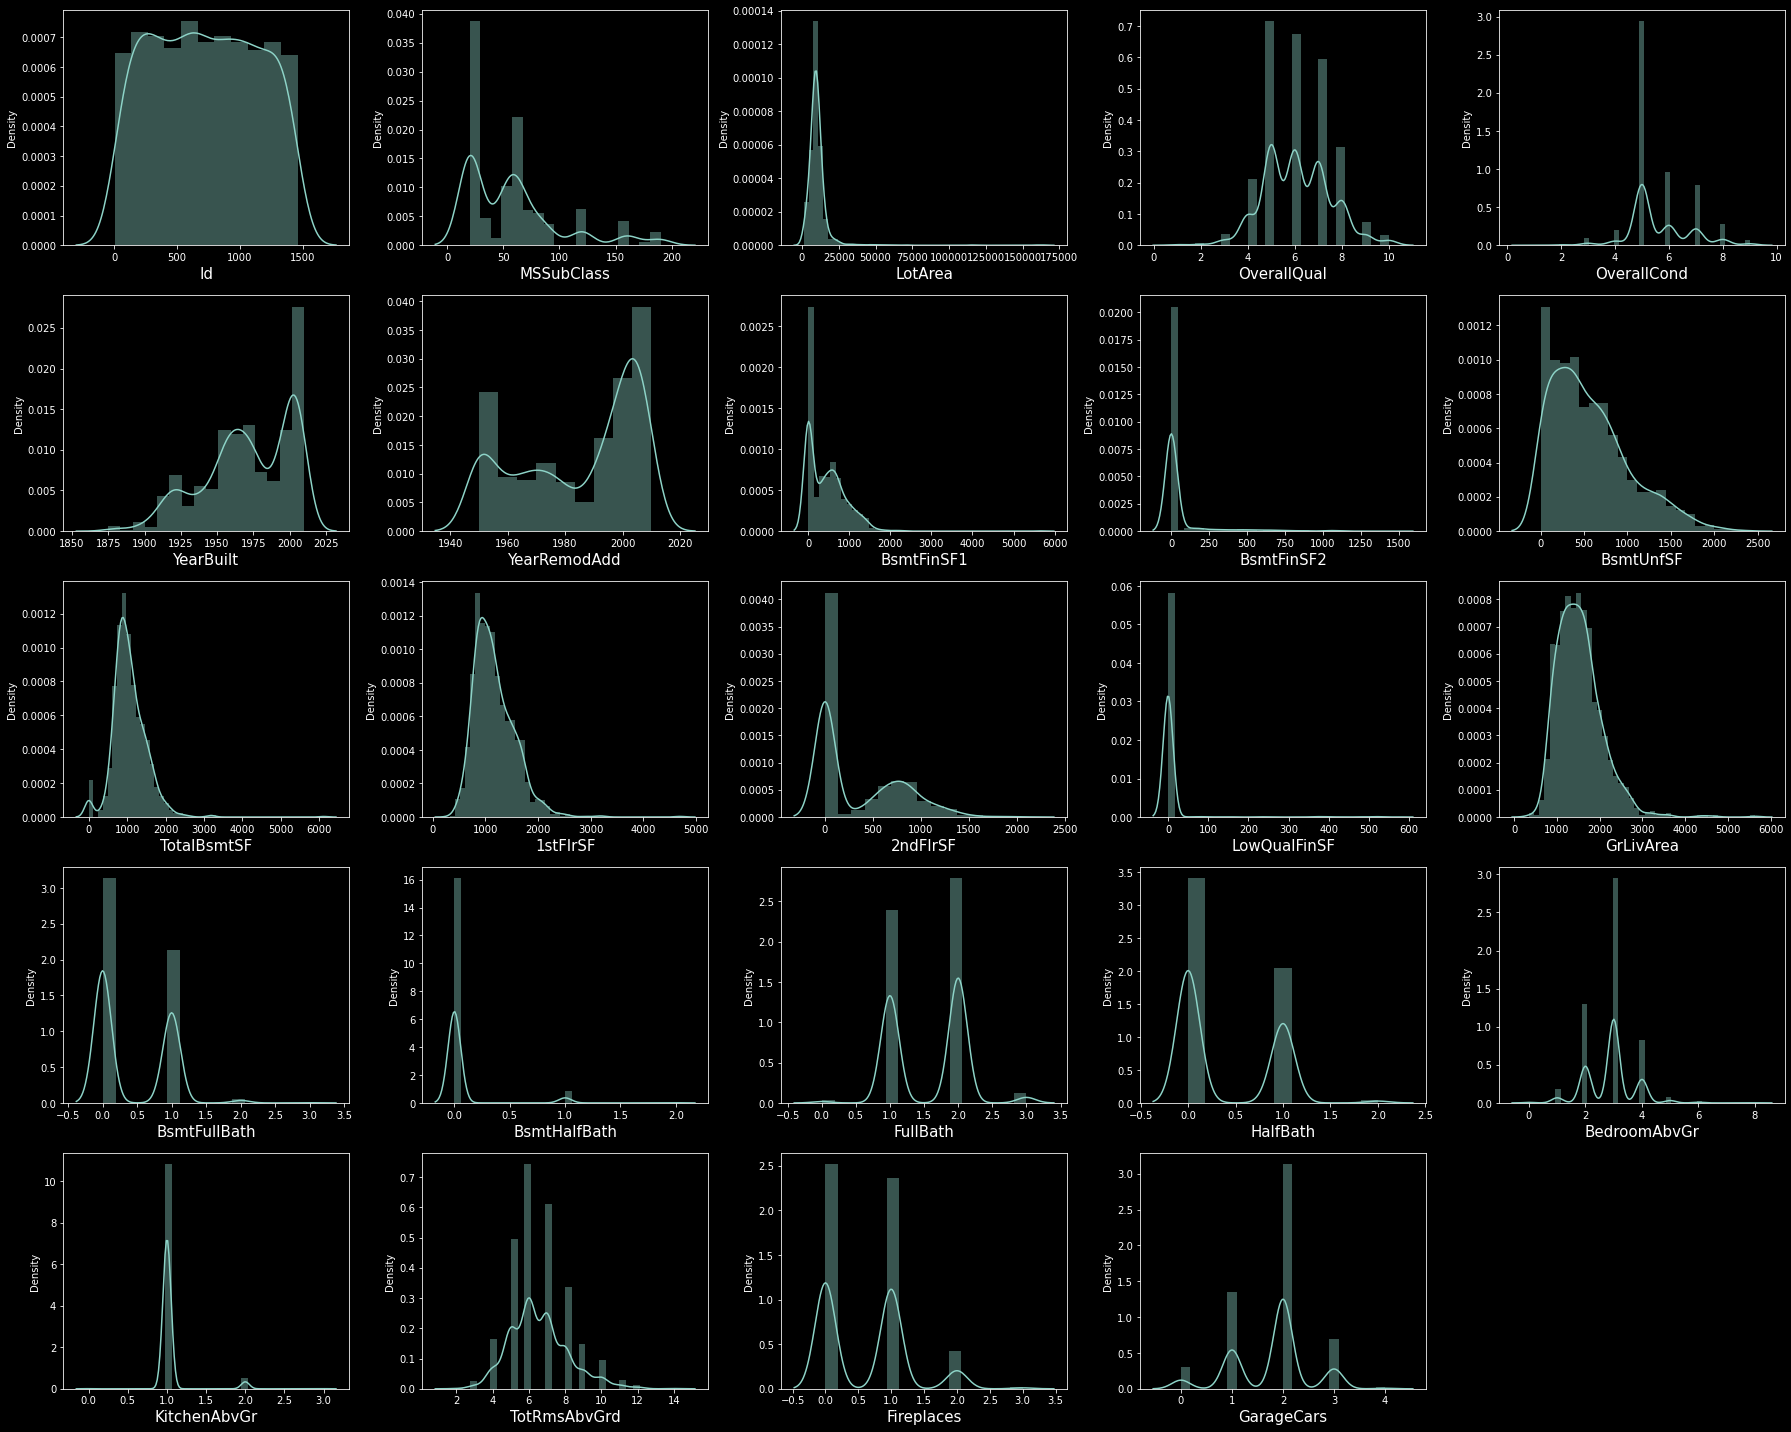

In [16]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_df:
    if plotnumber <= 24:
        
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

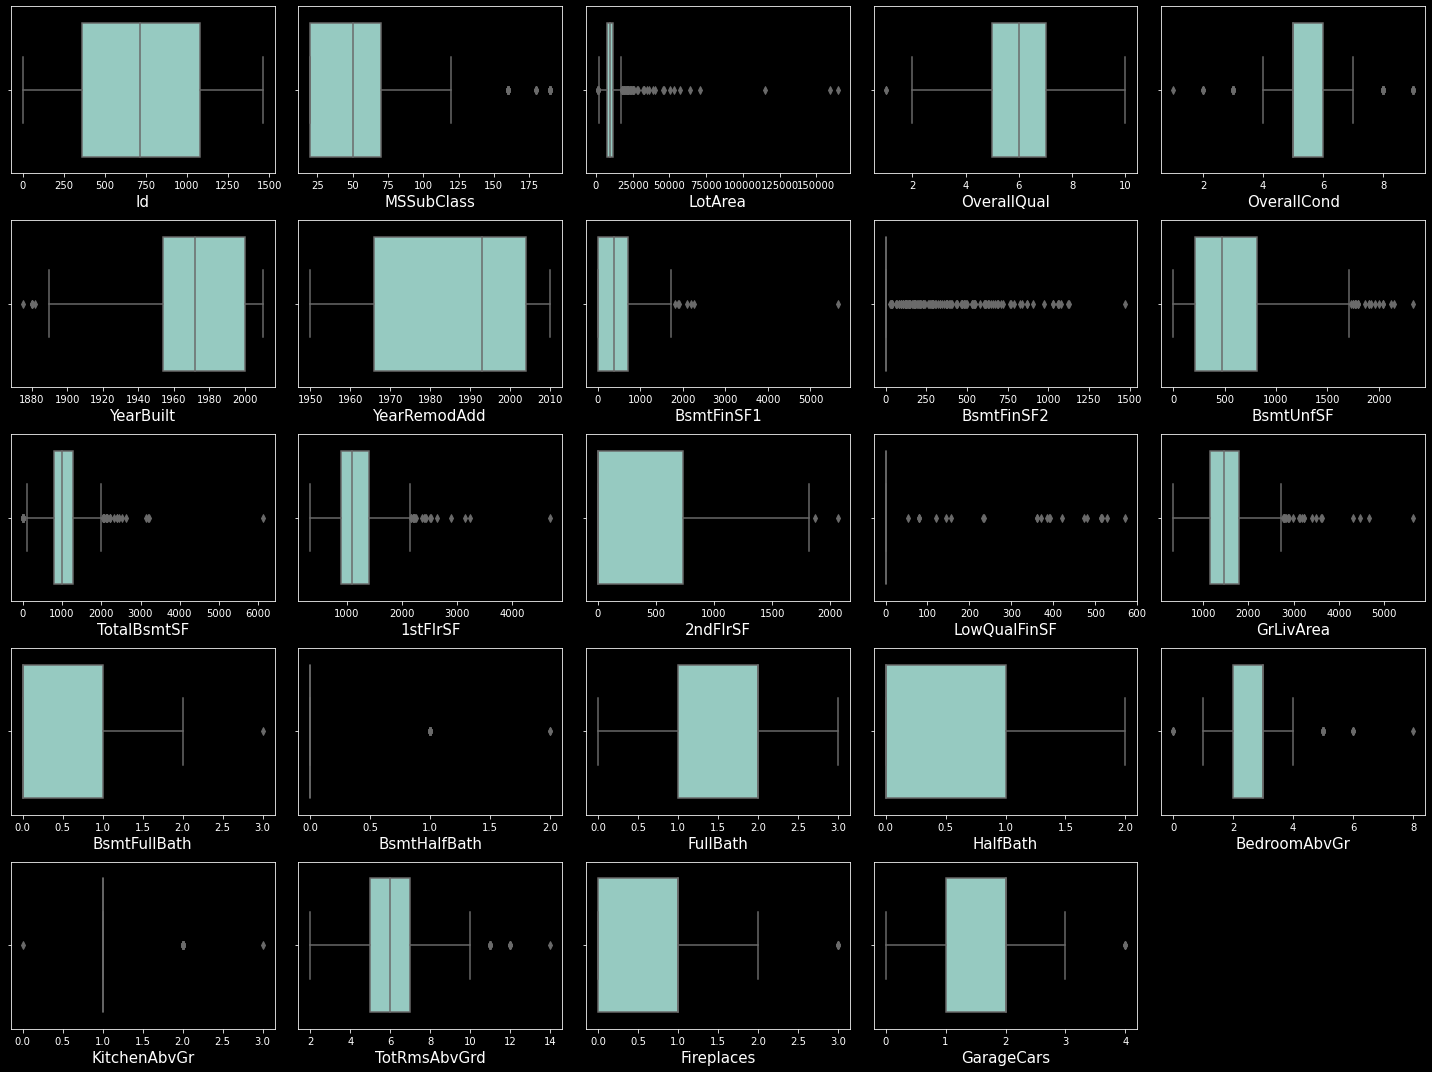

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_df:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [18]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()
df_encoded.fillna(0)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0      127         120          0.0     4928            6            5   
1      889          20         95.0    15865            8            6   
2      793          60         92.0     9920            7            5   
3      110          20        105.0    11751            6            6   
4      422          20          0.0    16635            6            7   
5     1197          60         58.0    14054            7            5   
6      561          20          0.0    11341            5            6   
7     1041          20         88.0    13125            5            4   
8      503          20         70.0     9170            5            7   
9      576          50         80.0     8480            5            5   
10     449          50         50.0     8600            6            6   
11     833          60         44.0     9548            7            6   
12     277          20        129.0     9196            7            5   
13      84          20         80.0     8892            5            5   
14     888          50         59.0    16466            5            7   
15    1013          70         55.0    10592            6            7   
16    1154          30          0.0     5890            6            8   
17     728          20         64.0     7314            7            5   
18     270          20          0.0     7917            6            7   
19    1105         160         24.0     2016            5            5   
20     259          60         80.0    12435            7            5   
21    1407          85         70.0     8445            5            7   
22    1459          20         68.0     9717            5            6   
23     997          20          0.0    10659            5            6   
24    1094          20         71.0     9230            5            8   
25     114          20          0.0    21000            6            5   
26    1384          30          0.0    25339            5            7   
27     379          20         88.0    11394            9            2   
28     556          45         58.0     6380            5            6   
29     464          70         74.0    11988            6            7   
30      46         120         61.0     7658            9            5   
31     426          60         60.0     3378            7            8   
32    1231          90          0.0    18890            5            5   
33     171          50          0.0    12358            5            6   
34     869          60          0.0    14762            5            6   
35     151          20        120.0    10356            5            6   
36     859          20         80.0    10400            7            5   
37     176          20         84.0    12615            6            7   
38     361          85          0.0     7540            6            6   
39     590          40         50.0     9100            5            6   
40     172          20        141.0    31770            6            5   
41     527          20         70.0    13300            5            7   
42    1365         160         30.0     3180            7            5   
43     146         160         24.0     2522            6            5   
44    1006          80         65.0     8385            5            8   
45     275          20         76.0     8314            5            7   
46     380          60         60.0     8123            6            5   
47    1309          20        100.0    12000            5            7   
48     534          20         50.0     5000            1            3   
49     494          20         70.0     7931            5            6   
50     701          20         85.0    14331            8            5   
51    1329          50         60.0    10440            6            7   
52    1101          30         60.0     8400            2            5   
53     902  

In [19]:
df_encoded.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              214
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 7
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               64
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal       

In [20]:
df_encoded.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 244 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(206)
memory usage: 581.8 KB


In [22]:
X = df_encoded.drop('SalePrice', axis = 1)
y = df_encoded['SalePrice']
X=X.fillna(0)
y=y.fillna(0)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [24]:
X_train.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
436    428          20         77.0     8593            4            6   
724    907          20        116.0    13501            8            5   
1007  1286          50         50.0     6000            6            6   
1047   298          60         66.0     7399            7            5   
791   1182         120         64.0     5587            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
436        1957          1957         0.0         288  ...               0   
724        2006          2006       208.0          63  ...               0   
1007       1939          1950         0.0           0  ...               0   
1047       1997          1998      1600.0         649  ...               0   
791        2008          2008       186.0        1480  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
436                0             0             0            1   
724                0             0             0            1   
1007               0             0             0            1   
1047               0             0             0            1   
791                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
436                       0                     0                     0   
724                       0                     0                     0   
1007                      0                     0                     0   
1047                      0                     0                     0   
791                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
436                      1                      0  
724                      1                      0  
1007                     1                      0  
1047                     1                      0  
791                      0                      1  

[5 rows x 243 columns]

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(876, 243)
(292, 243)
(876,)
(292,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_train_scale
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [27]:
x_test_scale = scaler.fit_transform(X_test)
x_test_scale

array([[-0.23929663, -0.6385575 , -0.28438747, ..., -0.13199092,
         0.44905021, -0.31919711],
       [-1.55212671, -0.15953684, -0.00971997, ..., -0.13199092,
         0.44905021, -0.31919711],
       [ 1.24559198,  3.19360773, -0.00971997, ..., -0.13199092,
         0.44905021, -0.31919711],
       ...,
       [-0.26758022,  0.07997348,  0.60065226, ..., -0.13199092,
         0.44905021, -0.31919711],
       [ 1.5425697 ,  0.6787493 ,  0.23442892, ..., -0.13199092,
         0.44905021, -0.31919711],
       [ 0.70820372,  2.47507675, -1.19994582, ..., -0.13199092,
         0.44905021, -0.31919711]])

In [28]:
x_test_scale_df = pd.DataFrame(data = x_test_scale, columns = X_test.columns)
x_test_scale_df

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
0   -0.239297   -0.638557    -0.284387  -0.440432    -2.916944    -2.334323   
1   -1.552127   -0.159537    -0.009720  -0.004540    -0.820764     0.297423   
2    1.245592    3.193608    -0.009720  -0.036828     0.576689    -1.457074   
3    0.630424    0.558994     0.142873  -0.211892    -0.820764     2.051921   
4    1.222022   -0.878068     0.936357   0.385241     1.275415    -0.579825   
5    0.684634   -0.159537     0.570134  -0.100194    -0.820764    -0.579825   
6   -0.694191    1.517035    -0.223350  -0.662213     0.576689    -0.579825   
7    1.622707    0.079973     0.631171   0.046314     0.576689    -0.579825   
8    1.629777   -0.878068    -1.840837   0.207958    -0.122038     1.174672   
9    0.446580    0.079973    -1.840837  -0.059026     0.576689    -0.579825   
10   1.573210    1.517035    -0.498018  -0.670285     1.275415    -0.579825   
11   0.380585   -0.878068     0.142873  -0.352346    -0.820764     1.174672   
12  -1.559198   -0.878068    -1.840837  -0.202810    -1.519491     1.174672   
13  -1.712400    0.079973     0.753245   0.145197     1.974142    -0.579825   
14  -0.588128    3.193608    -0.009720   0.031785    -0.820764    -1.457074   
15  -0.291150    2.954097    -1.199946  -0.907503    -1.519491     0.297423   
16  -0.206299    0.079973     0.142873  -0.238126     0.576689     0.297423   
17  -0.168588    0.079973    -1.840837   0.803678    -0.122038    -0.579825   
18   0.606854   -0.159537    -0.284387  -0.582501    -1.519491     1.174672   
19   1.467147    0.319484    -0.284387  -0.064879    -0.820764     0.297423   
20  -0.665907   -0.878068     0.600652  -0.089297     0.576689     0.297423   
21   1.700486   -0.878068     0.448059  -0.055293    -0.820764     0.297423   
22   1.672203    0.079973     0.600652  -0.048936     1.275415    -0.579825   
23   0.184957   -0.878068    -1.840837   0.094848    -0.820764     0.297423   
24   1.021680   -0.878068     0.478578  -0.137729    -0.122038     0.297423   
25   0.976898   -0.878068     0.905838   0.366272    -0.122038     1.174672   
26   0.163745    0.319484     2.553843   1.099721    -0.820764     0.297423   
27   0.250952   -0.159537     1.211024   0.219965    -0.820764     2.051921   
28  -1.198582    1.517035    -0.528536  -0.736880     0.576689    -0.579825   
29   1.368154   -0.878068    -1.840837   0.433472     1.275415    -0.579825   
30   1.516643   -0.878068    -1.840837   0.246199    -0.122038     1.174672   
31  -0.229869    1.517035     0.051317   0.221176     1.275415    -0.579825   
32  -0.225155    0.558994     0.448059   0.340542     1.275415     1.174672   
33  -0.783756   -0.878068    -1.840837  -0.049844    -1.519491    -1.457074   
34  -1.396567    2.475077    -1.108390  -0.803474    -0.122038    -0.579825   
35  -1.370640   -0.878068    -0.009720  -0.331459    -0.820764     1.174672   
36  -0.196871   -0.878068     0.936357  -0.004843     1.275415     0.297423   
37   0.913260   -0.878068    -0.009720  -0.005145    -1.519491    -0.579825   
38  -0.281722   -0.878068     0.905838   0.121990     1.974142    -0.579825   
39  -1.281076   -0.878068    -0.009720  -0.333477    -0.820764     1.174672   
40  -1.158513    3.193608     0.264948  -0.135509    -0.122038     2.051921   
41   0.121319    0.079973    -1.840837   0.173550    -0.122038     2.051921   
42   1.481289    0.079973     0.234429  -0.131776     0.576689    -0.579825   
43  -0.658837    0.319484    -1.840837  -0.543351     1.275415     1.174672   
44   1.535499   -0.159537    -0.009720  -0.452541    -0.122038     0.297423   
45  -1.040665   -0.159537     0.448059   0.325407    -0.820764    -0.579825   
46   0.357016   -0.878068     2.065546   0.169010    -0.122038    -1.457074   
47  -0.128519   -0.878068     0.905838   0.076988     1.974142    -0.579825   
48   0.460722   -0.878068     0.081836  -0.201600     0.576689    -0.579825   
49  -1.033594   -0.878068     0.600652   0.354668    -0.12203

In [29]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-0.70530338 -0.87670698  0.54574595 ... -0.12273439  0.49785866
  -0.31919711]
 [ 0.45430886 -0.87670698  1.62087365 ... -0.12273439  0.49785866
  -0.31919711]
 [ 1.37183087 -0.16207114 -0.19857323 ... -0.12273439  0.49785866
  -0.31919711]
 [-1.02002069  0.0761408   0.2425048  ... -0.12273439  0.49785866
  -0.31919711]
 [ 1.12005702  1.50541248  0.18737005 ... -0.12273439 -2.00860219
   3.13286048]]
test data
[[-0.19933478 -0.63849503 -0.17100585 ... -0.12273439  0.49785866
  -0.31919711]
 [-1.54777741 -0.16207114  0.07710054 ... -0.12273439  0.49785866
  -0.31919711]
 [ 1.32583372  3.17289609  0.07710054 ... -0.12273439  0.49785866
  -0.31919711]
 [ 0.6939782   0.5525647   0.21493743 ... -0.12273439  0.49785866
  -0.31919711]
 [ 1.3016247  -0.87670698  0.93168923 ... -0.12273439  0.49785866
  -0.31919711]]


In [30]:
linearRegModel = LinearRegression(n_jobs=-1)

In [31]:
linearRegModel.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 181216.41215122395
coefficients  is [ 1.36870134e+03 -4.97742980e+03  4.09467760e+02  9.16121186e+03
  1.01413642e+04  6.13307452e+03  1.41835665e+04  2.86496482e+03
  2.68657541e+03 -1.89287089e+16 -6.66931959e+15 -1.85852537e+16
  1.83761827e+16  1.00210570e+16  1.11998123e+16  1.36576153e+15
 -1.34689830e+16  1.58238892e+03  2.62223257e+02  7.25823551e+02
 -2.35275391e+02 -2.92686252e+03 -8.72558438e+02  2.03858351e+02
  1.81311588e+03 -3.97201914e+01  4.69717166e+03  3.02040176e+02
  1.20075927e+03  6.34407317e+02 -7.59769743e+02  9.70849509e+02
  1.96442131e+03  7.55118525e+03 -3.03388823e+01 -1.74115187e+03
 -1.30929563e+03  6.13100771e+03  2.61133405e+03  8.55243467e+03
  5.50273248e+03  3.51719485e+03  9.72274962e+02 -3.38083584e+02
  1.02166598e+03  1.67068226e+02 -1.81073659e+02 -3.08206772e+03
 -1.04994639e+03  2.44278146e+03 -8.30272672e+02  6.41946815e+02
 -1.30171446e+02  7.20707782e+02 -5.95365373e+03  2.39119746e+02
  9.30820191e+02 -3.34164505e+02 -1.87289

In [33]:
y_pred = linearRegModel.predict(X_test)

In [34]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

292
292
[ 80755.93627849 104415.43845848 151404.98616097 128065.22690663
 328766.13784014]
510      60000
828     110000
590     122000
44      149900
1143    301500
Name: SalePrice, dtype: int64


In [35]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

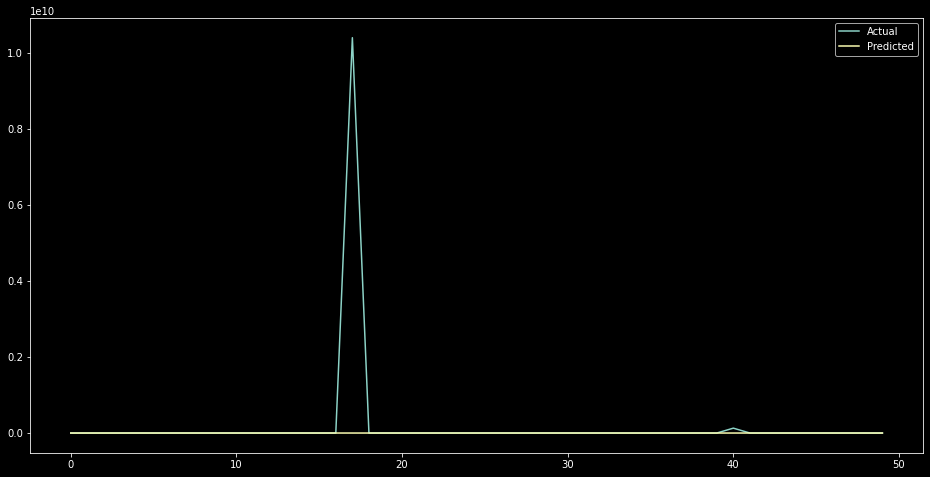

In [36]:
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

3.756441545799963e+16
19036.190057838056


In [38]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [39]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 37503.66666667, 134316.66666667, 162000.        , 131826.875     ,
       173750.        , 116749.03846154, 197030.        , 203000.        ,
       180450.        , 203000.        , 239375.        , 131826.875     ,
       103927.44444444, 485000.        , 127000.        ,  82500.        ,
       218460.625     , 154800.        , 117000.44444444, 144000.        ,
       173000.        , 145923.2       , 219333.33333333, 164300.        ,
       159127.27272727, 250250.        , 136633.33333333, 134316.66666667,
       200504.88636364, 239713.33333333, 250250.        , 239375.        ,
       242000.        , 175000.        , 176522.64705882, 116749.03846154,
       369900.        , 103927.44444444, 320000.        , 116749.03846154,
       100750.        , 200000.        , 218460.625     , 130000.        ,
       116749.03846154, 153133.42857143, 183360.        , 315500.        ,
       218879.16666667, 173140.66666667,  92900.        , 197030.        ,
       208300.        , 1

In [40]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:5])
print(y_test[0:5])

292
292
[ 37503.66666667 134316.66666667 162000.         131826.875
 173750.        ]
510      60000
828     110000
590     122000
44      149900
1143    301500
Name: SalePrice, dtype: int64


In [41]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

49934.00238560994


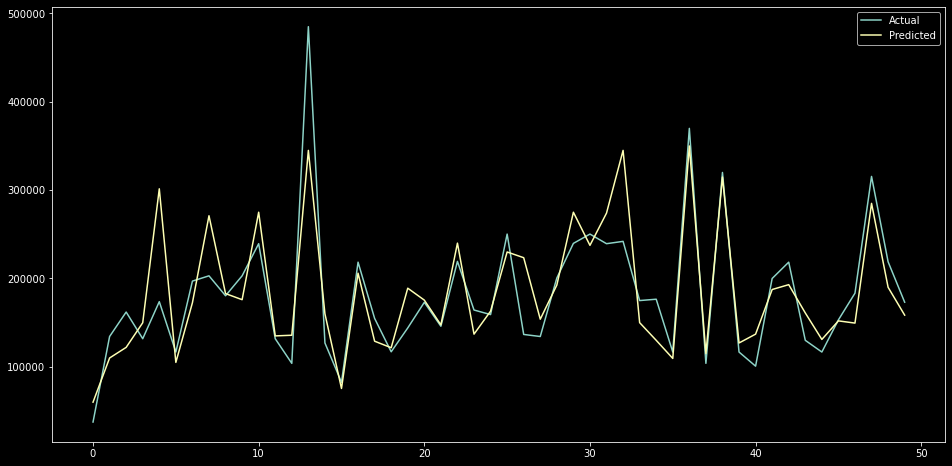

In [42]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

In [43]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [44]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

292
292
[ 64870.73333333 115474.4        180743.83333333 132606.66666667
 356851.3       ]
510      60000
828     110000
590     122000
44      149900
1143    301500
Name: SalePrice, dtype: int64


In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

33363.52683381692


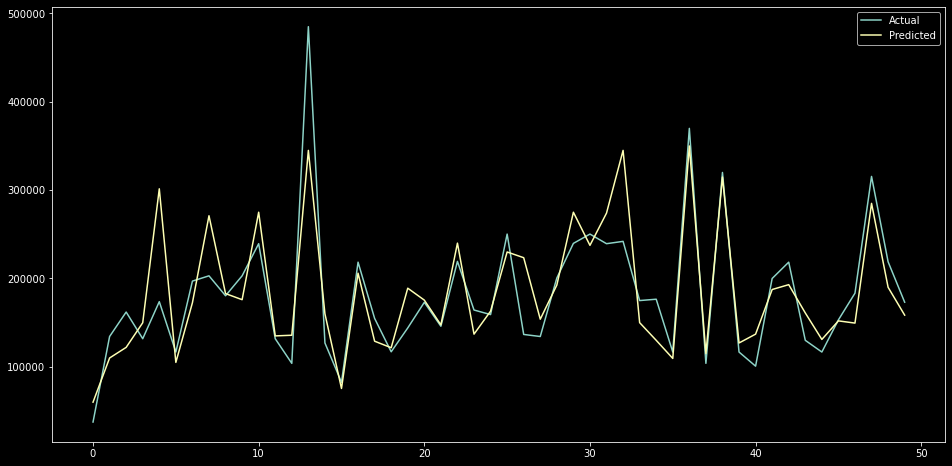

In [46]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])